# Comparison of GDP per capita between countries in Africa and Americas


**Anna Williford**  
_February 2019_

Adapted from a [lesson](https://github.com/AnnaWilliford/2017-02-04-UTA/blob/gh-pages/workshop/02_day/02_pm/demographic_analysis_report.ipynb) by Daren Card, November 2017

***

## Introduction

Gross Domestic Product (GDP) per capita is a country's income per person. To compare GDP per capita between countries in Africa and Americas, I used [gapminder dataset](https://raw.githubusercontent.com/utacarpentries/2019-02-23-UTA/gh-pages/data/gapminder.txt )

## Data analysis

I downloaded dataset `gapminder.txt` to my working directory, `Reports`. I used Linux tools and Python to work with gapminder dataset. Linux command-line tools are very useful for simple manipulation of text files while Python is a great tool for data visualization. 


### Data overview 

My first step in the analysis of gapminder dataset is to know exactly what kind of data is available in the dataset.
Here are the Linux commands I used to examine my dataset.

In [137]:
%%writefile checkData.sh 
# `%%writefile`  writes contents of the cell to checkData.sh file
# `%pycat` checkData.sh will display contents of the saved checkData.sh file in a pop-up window


#This is "checkData.sh"

echo "Top 5:"
head -n5 gapminder.txt

echo -e "\nBottom 5:"
tail -n5 gapminder.txt

echo "Tab-delimited?"
head -n3 gapminder.txt | cat -t

echo "How many countries are in my data?"
cut -f1 gapminder.txt| grep -v 'country'| sort | uniq |wc -l

echo "For what years do I have data?"
cut -f3 gapminder.txt| grep -v 'year'|sort | uniq

echo "Does every country have data for the same number of years?"
cut -f3 gapminder.txt|grep -v 'year' |sort |uniq -c 


Overwriting checkData.sh


In [138]:
%%bash
bash ./checkData.sh

Top 5:
country	continent	year	lifeExp	pop	gdpPercap
Afghanistan	Asia	1952	28.801	8425333	779.4453145
Afghanistan	Asia	1957	30.332	9240934	820.8530296
Afghanistan	Asia	1962	31.997	10267083	853.10071
Afghanistan	Asia	1967	34.02	11537966	836.1971382

Bottom 5:
Zimbabwe	Africa	1987	62.351	9216418	706.1573059
Zimbabwe	Africa	1992	60.377	10704340	693.4207856
Zimbabwe	Africa	1997	46.809	11404948	792.4499603
Zimbabwe	Africa	2002	39.989	11926563	672.0386227
Zimbabwe	Africa	2007	43.487	12311143	469.7092981
Tab-delimited?
country^Icontinent^Iyear^IlifeExp^Ipop^IgdpPercap
Afghanistan^IAsia^I1952^I28.801^I8425333^I779.4453145
Afghanistan^IAsia^I1957^I30.332^I9240934^I820.8530296
How many countries are in my data?
     142
For what years do I have data?
1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007
Does every country has data for the same number of years?
 142 1952
 142 1957
 142 1962
 142 1967
 142 1972
 142 1977
 142 1982
 142 1987
 142 1992
 142 1997
 142 2002
 142 2007


**Summary**  
The dataset contains information about life expectancy, population size and GDP per capita for 142 countries for 12 non-consecutive years ranging from 1952 to 2007.

### Analysis of GDP per capita 

My dataset is in a proper format and is ready for analysis. I used Python's [Pandas](https://pandas.pydata.org/) library to work with the dataset as a data frame object. To make plots, I use [plotnine](http://plotnine.readthedocs.io/en/stable/index.html) library that implements [ggplot2](https://ggplot2.tidyverse.org/) package from R.  

Here is the complete script that performs the analysis. The analysis workflow is explained below.

In [139]:
#This is GDP_Africa_America.py
""" This scripts uses gapminer.txt to compare GDP per capita between contries in Africa and Americas """

######### import statements ############
from plotnine import *
import pandas as pd


######## function definitions ##########

def SelectDataByCont(df,continents_list):
    """select data for continents given in the 'continents_list' from a dataframe 'df'"""    
    dataSubset=df.loc[df['continent'].isin(continents_list),:]
    return dataSubset

def GetMeansByCategory(df,groupby_list):
    """calculate the means of data from 'df' grouped by categories given in 'groupby_list' """   
    dataMeans=df.groupby(groupby_list, as_index=False).mean()
    return dataMeans

def MakeBarPlot(df):
    """ make a barplot with data from 'df' """
    p=ggplot(df) + \
        aes(x = 'continent', y = 'gdpPercap', fill='continent') + \
        geom_bar(stat='stat_identity', color="grey", show_legend=False) + \
        xlab('Continent') + \
        ylab('GDP per capita') +\
        ggtitle('GDP per capita: a comparison')         
    return p 


######## load data ##########

#read data into Python
gapminder=pd.read_table("gapminder.txt")


######## data analysis ##########
#### Step1: Select data for Asia and Americas

#make a list of continents to select
ToSelect=['Africa','Americas']

#call SelectDataByCont(df,continents_list) function
myNewData=SelectDataByCont(gapminder,ToSelect)


#### Step2: Create dataframe with gdpPercap values averaged over all years for each continent

#define grouping variable as continent
groupBy=['continent']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCont=GetMeansByCategory(myNewData,groupBy)


#### Step3: Create a barplot to visualize avergae GDP per capita for Asia and Americas

#call MakeBarPlot(df)
p=MakeBarPlot(myNewData_meanPerCont)


#### Step4: Overlay barplot with gdpPercap values averaged over all years for every country.

## Step4.1: Create a new dataset with  gdpPercap values averaged across all years for every country and continent
#get averages across years for every country, keeping continents in the dataframe
#define grouping categories
groupBy_2=['continent','country']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCountry=GetMeansByCategory(myNewData,groupBy_2)


## Step4.2: Add averaged gdpPercap values per country to barplot
#p=MakeBarPlot(myNewData_meanPerCont) from Step 3
p1=p+geom_point(myNewData_meanPerCountry,aes(x = 'continent',  y = 'gdpPercap'),fill='black', \
             position=position_jitter(width=0.02), alpha=0.5)



#### Step5: Save plot to file
p1.save(filename="GDP_Africa_Americas.png", height=4, width=5, units = 'in')

/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GDP_Africa_Americas.png
  warn('Filename: {}'.format(filename))


### Analysis workflow

To compare GDP per capita between Africa and Americas, I implemented the following steps in Python.

0. Load gapminer.txt into Python as data frame
2. Select rows with information about countries located in Africa or Americas
2. Create a data frame with mean values of GDP per capita for Africa and Americas
3. Create a barplot to visualize average GDP per capita
4. Overlay barplot with GDP per capita values averaged over all years for every country. This is done to visualize the variation in GDP per capita among different countries on each continent
5. Save plot to file

#### To work through steps outline above, import libraries and load the dataset:

In [140]:
from plotnine import *
import pandas as pd

gapminder=pd.read_table("gapminder.txt")

#### Function definitions:

To implement the steps above, I define 3 functions:  
#### Function 1:

In [141]:
def SelectDataByCont(df,continents_list):
    """select data for continents given in the 'continents_list' from a dataframe 'df'"""    
    dataSubset=df.loc[df['continent'].isin(continents_list),:]
    return dataSubset

The same funciton can be written like this:

In [142]:
def SelectDataByCont(df,continents_list):
    """select data for continents given in the 'continents_list' from a dataframe 'df'"""    
    dataSubset=df[df.continent.isin(continents_list)]
    return dataSubset

**About this function**:  

Select rows where 'continent' is the continent name listed in the `continents_list`  
`isin` method allows to subset the data for any number of continents given in the list.  

In **Step1**, we create `ToSelect` list to include the continents we want. I then pass this list to `SelectDataByCont` function. The output of `SelectByCont` is stored in `myNewData` data frame. 

In [159]:
ToSelect=['Africa', 'Americas']
myNewData=SelectDataByCont(gapminder, ToSelect)
myNewData['continent'].unique()

array(['Africa', 'Americas'], dtype=object)

Why to write a function instead of just using `isin` method?  
Because if I want data for a new set of continents somewhere during my analysis, 
I can just reuse the function and NOT write complicated expression multiple times.  

#### Function 2:

In [144]:
def GetMeansByCategory(df,groupby_list):
    """calculate the means of data from 'df' grouped by categories given in 'groupby_list' """   
    dataMeans=df.groupby(groupby_list, as_index=False).mean()
    return dataMeans 

**About this function:**  
    
`.groupby` method is a very useful function that allows us to split the dataset by category of interest
and then apply a function to each category.   
In **Step2**, we split our dataset by 'continent' and apply `mean` to get averages for every continent:


In [160]:
#define grouping variable as continent
groupBy=['continent']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCont=GetMeansByCategory(myNewData,groupBy)
myNewData_meanPerCont

,continent,year,lifeExp,pop,gdpPercap
0,Africa,1979.5,48.865330,9.916003e+06,2193.754578
1,Americas,1979.5,64.658737,2.450479e+07,7136.110356


We can apply different functions to each group, for example:  

In [146]:
groupedData_means=myNewData.groupby('continent', as_index=False).mean()
groupedData_sums=myNewData.groupby('continent', as_index=False).sum()
groupedData_count=myNewData.groupby('continent', as_index=False).count()


#### Function 3:

In [167]:
def MakeBarPlot(df):
    """ make a barplot with data from 'df' """
    p=ggplot(df) + \
        aes(x = 'continent', y = 'gdpPercap', fill='continent') + \
        geom_bar(stat='stat_identity', color="grey", show_legend=False) + \
        xlab('Continent') + \
        ylab('GDP per capita') + \
        ggtitle('GDP per capita: a comparison')
    return p 


**About this function**  
This function makes a barplot. You can think of it as a function to make a base plot to which other layers can be added.  
In **Step3**, we plot means of gdpPercap for 'Africa' and 'Americas' using `myNewData_meanPerCont` data frame:

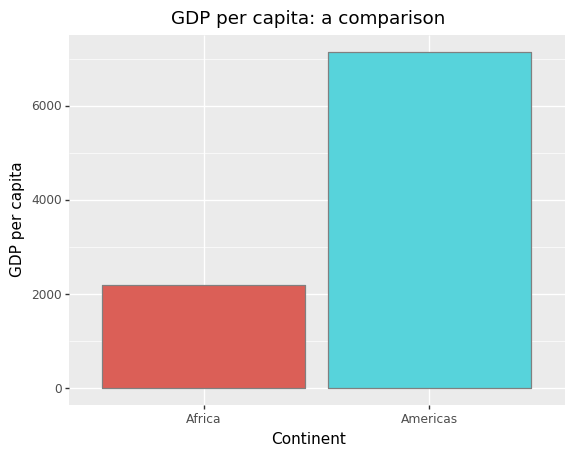

<ggplot: (7553022910)>


In [168]:
p=MakeBarPlot(myNewData_meanPerCont)
print(p)

In **Step4**, we first calculate gdpPercap means for every country over all years using
`GetMeansByCategory()` function we used in **Step2**  
To keep 'continent' column in the dataset, we group by both, 'continent' and 'country'

In [161]:
groupBy_2=['continent','country']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCountry=GetMeansByCategory(myNewData,groupBy_2)
myNewData_meanPerCountry.head()

,continent,country,year,lifeExp,pop,gdpPercap
0,Africa,Algeria,1979.5,59.030167,1.987541e+07,4426.025973
1,Africa,Angola,1979.5,37.883500,7.309390e+06,3607.100529
2,Africa,Benin,1979.5,48.779917,4.017497e+06,1155.395107
3,Africa,Botswana,1979.5,54.597500,9.711862e+05,5031.503557
4,Africa,Burkina_Faso,1979.5,44.694000,7.548677e+06,843.990665


We now add gdpPerCap country averages to the bar plot as `geom_point()` layer to show variation in gdpPercap among countries in each continent:

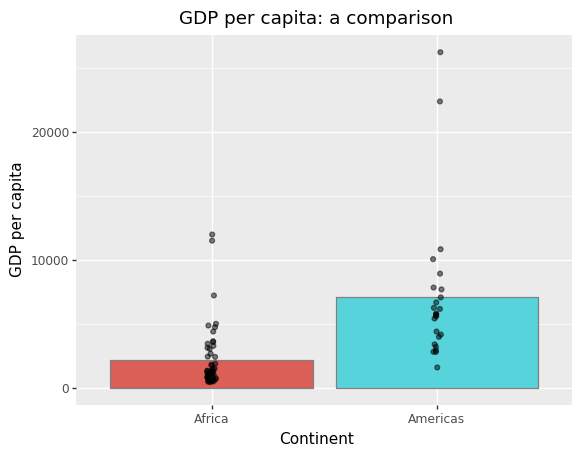

<ggplot: (284025783)>


In [179]:
p1=p+geom_point(myNewData_meanPerCountry,aes(x = 'continent',  y = 'gdpPercap'),
                fill='black',
                position=position_jitter(width=0.02), 
                alpha=0.5)
print(p1)

In **Step5**, the plot is saved to file:

In [151]:
p1.save(filename="GDP_Africa_Americas.png", height=4, width=5, units = 'in')

/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GDP_Africa_Americas.png
  warn('Filename: {}'.format(filename))


## Conclusion
There is a large variation in GDP per capita among countries of Africa and Americas. On average, American continents are about 3 times wealthier than Africa.